In [772]:
## Task 1 : Import pkg and load df

In [773]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [774]:
path = 'D:/report/data/sales2019_1.csv'
root = 'D:/report/data/'

dataframe = pd.read_csv(path)
dataframe

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
9718,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
9719,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
9720,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
9721,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"


In [775]:
## Task 2 : Clean and Preprocess data

In [776]:
## Task 2.1 : Merge 12 month data

In [777]:
file_paths = []
frames = []
for file in os.listdir(root):
    if file.endswith('.csv'):
        file_path = root + file
        df1 = pd.read_csv(file_path)
        frames.append(df1)
        result = pd.concat(frames)
result

df = result
df.to_csv('annual_sale_2019.csv', index=False)

In [778]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [779]:
df['Month'] = ''
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",


In [780]:
## Task 2.2 : Add 'Month' column

In [781]:
df['Month'] = df['Order Date'].str[0:2]

In [782]:
set(df['Month'])

{'01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '11',
 '12',
 'Or',
 nan}

In [783]:
#Task 2.3 : Get rid of 'NAN' and 'Or' value

In [784]:
df = df.dropna(how='all')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [785]:
df.loc[df['Month'] != 'Or']
df = df[df['Month'] != 'Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [786]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast='integer')
df['Price Each'] = pd.to_numeric(df['Price Each'], downcast='float')

In [787]:
## Task 3: Reporting

In [788]:
## Task 3: Best month of sale   

In [789]:
df['Sale'] = df['Quantity Ordered'] * df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale
0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.000000
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.950000
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.980000
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.990005
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.990000


In [790]:
df.groupby('Month').sum()

,Quantity Ordered,Price Each,Sale
Month,,,
01,10903.0,1811768.375,1822256.75
02,13449.0,2188884.750,2202022.50
03,17005.0,2791207.750,2807100.25
04,20558.0,3367671.000,3390670.25
05,18667.0,3135125.000,3152606.75
06,15253.0,2562025.500,2577802.25
07,16072.0,2632539.500,2647775.75
08,13448.0,2230345.500,2244467.75
09,13109.0,2084992.125,2097560.00


In [791]:
sale_value = df.groupby('Month').sum()['Sale']
sale_value.max()

4613443.5

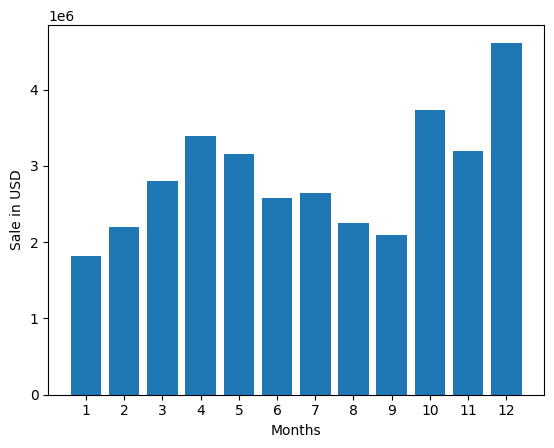

In [792]:
months = range(1,13)
plt.bar(months, sale_value)
plt.xticks(months) # Show label total month
plt.xlabel('Months') # Set label for axis X
plt.ylabel('Sale in USD') # Set label for axis Y
plt.show()

In [793]:
# Task 3.2 : What city has the best sale

In [794]:
address_to_city = lambda e : e.split(',')[1].strip()
address_to_city

In [795]:
df['City'] = df['Purchase Address'].apply(address_to_city)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City
0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.000000,Boston
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.950000,Portland
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.980000,San Francisco
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.990005,Los Angeles
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.990000,Austin


In [796]:
df.groupby('City').sum()

,Quantity Ordered,Price Each,Sale
City,,,
Atlanta,16602.0,2779908.250,2795498.50
Austin,11153.0,1809873.625,1819581.75
Boston,22528.0,3637409.750,3661642.00
Dallas,16730.0,2752627.750,2767975.50
Los Angeles,33289.0,5421435.000,5452571.00
New York City,27932.0,4635371.000,4664317.50
Portland,14053.0,2307747.500,2320490.50
San Francisco,50239.0,8211461.500,8262204.00
Seattle,16553.0,2733296.000,2747755.50


In [797]:
sale_value_city = df.groupby('City').sum()['Sale']
sale_value_city.max()

8262204.0

In [798]:
cities = [city for city,sales in sale_value_city.items()]

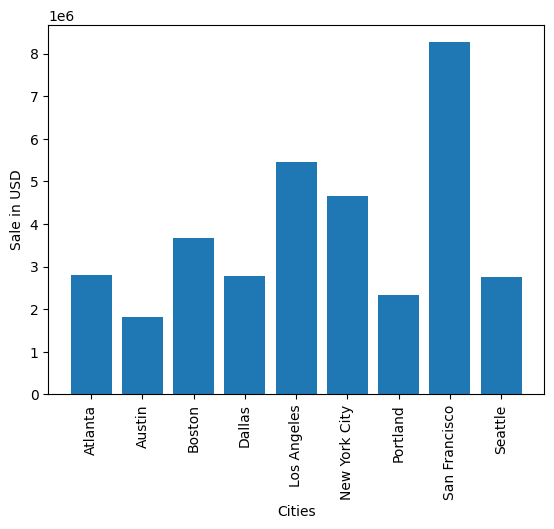

In [799]:
plt.bar(x=cities, height=sale_value_city)
plt.xticks(cities, rotation=90)
plt.xlabel('Cities')
plt.ylabel('Sale in USD')
plt.show()

In [800]:
# Task 3.3 : What time should we display ads to maximize the likelihood of customer's buying product

In [801]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City
0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.000000,Boston
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.950000,Portland
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.980000,San Francisco
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.990005,Los Angeles
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.990000,Austin


In [802]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [803]:
df['Hours'] = df['Order Date'].dt.hour
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,Hours
0,141234,iPhone,1,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,700.000000,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,14.950000,Portland,14
2,141236,Wired Headphones,2,11.990000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,23.980000,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,149.990005,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,11.990000,Austin,11
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.990000,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",09,8.970000,Los Angeles,20
11682,259354,iPhone,1,700.000000,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",09,700.000000,San Francisco,16
11683,259355,iPhone,1,700.000000,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",09,700.000000,San Francisco,7
11684,259356,34in Ultrawide Monitor,1,379.989990,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",09,379.989990,San Francisco,17


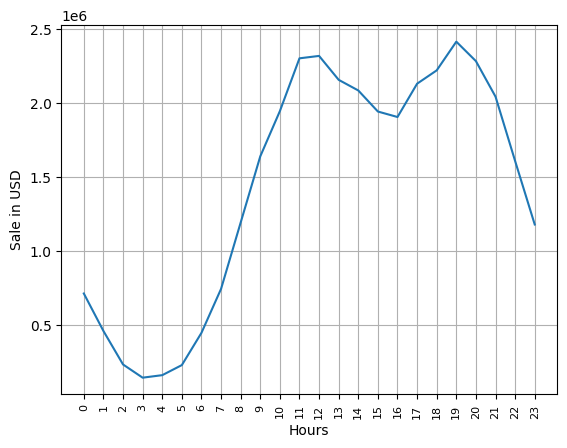

In [804]:
sale_value_hours = df.groupby('Hours').sum()['Sale']

hours = [hour for hour,sale in sale_value_hours.items() ]

plt.plot(hours, sale_value_hours)
plt.grid()
plt.xticks(hours, rotation=90, size=8)
plt.xlabel('Hours')
plt.ylabel('Sale in USD')
plt.show()

In [805]:
# Task 3.4 : What products are most often sold together

In [806]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,Hours
0,141234,iPhone,1,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,700.000000,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,14.950000,Portland,14
2,141236,Wired Headphones,2,11.990000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,23.980000,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,149.990005,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,11.990000,Austin,11


In [807]:
# Find duplicated in pandas
df_dup = df[df['Order ID'].duplicated(keep=False)]
df_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,Hours
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,11.95,Austin,16
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,11.99,Austin,16
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,150.00,Los Angeles,8
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,11.52,Los Angeles,8
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,400.00,New York City,11


In [808]:
group_product = lambda product : ','.join(product)

In [809]:
df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(group_product)
df_dup.head()

C:\Users\ntnam7\AppData\Local\Temp\ipykernel_19536\3980544959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(group_product)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,Hours,All Products
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,11.95,Austin,16,"USB-C Charging Cable,Wired Headphones"
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,11.99,Austin,16,"USB-C Charging Cable,Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,150.00,Los Angeles,8,"Apple Airpods Headphones,AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,11.52,Los Angeles,8,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,400.00,New York City,11,"Vareebadd Phone,Wired Headphones"


In [810]:
df_dup[['Order ID', 'All Products']].drop_duplicates()

,Order ID,All Products
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
11617,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
11619,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
11627,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [811]:
df_dup['All Products'].value_counts().head(10)

iPhone,Lightning Charging Cable                       1764
Google Phone,USB-C Charging Cable                     1712
iPhone,Wired Headphones                                722
Vareebadd Phone,USB-C Charging Cable                   624
Google Phone,Wired Headphones                          606
iPhone,Apple Airpods Headphones                        572
Google Phone,Bose SoundSport Headphones                322
Google Phone,USB-C Charging Cable,Wired Headphones     231
Vareebadd Phone,Wired Headphones                       208
iPhone,Lightning Charging Cable,Wired Headphones       168
Name: All Products, dtype: int64

In [812]:
# What product sold the most ? Why do you think it the most? 

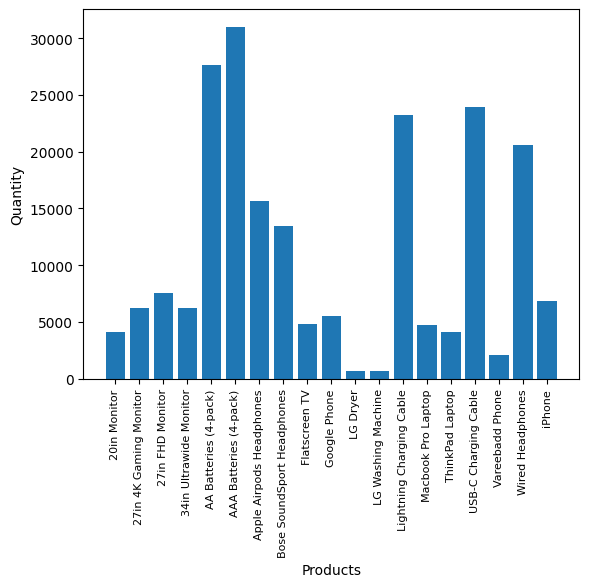

In [814]:
from itertools import product


df.head()
all_products = df.groupby('Product').sum()['Quantity Ordered'] #Get list product

product_ls = [pd for pd,qty in all_products.items()]
plt.bar(product_ls, all_products)
plt.xticks(product_ls, rotation=90, size=8)
plt.xlabel('Products')
plt.ylabel('Quantity')
plt.show()



In [815]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sale,City,Hours
0,141234,iPhone,1,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,700.000000,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,14.950000,Portland,14
2,141236,Wired Headphones,2,11.990000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,23.980000,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,149.990005,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,11.990000,Austin,11
...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.990000,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",09,8.970000,Los Angeles,20
11682,259354,iPhone,1,700.000000,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",09,700.000000,San Francisco,16
11683,259355,iPhone,1,700.000000,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",09,700.000000,San Francisco,7
11684,259356,34in Ultrawide Monitor,1,379.989990,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",09,379.989990,San Francisco,17
